# P-Value

https://web.vscht.cz/~spiwokv/statistika/skripta.pdf <br>
page: 53

### p-Value
P-value is a probability in statistical significance testing of obtaining result as extreme as the result we have obtained under the assumption null hypothesis is true. 
<br>



### Null hypothesis
Null hypothesis states that two means are from the same distribution, where variances are also the same. In case of rejecting $H_0$ we work with alternative hypothesis $H_1$.<br>
$H_0: \mu_1 = \mu_2 $

### Alternative hypothesis
<br>
1. $H_1$:  x̅ ≠ µ. Sample mean is not equal to the population mean. -> Two Tailed t-Test.
<br>
2. $H_1$:  x̅ > µ. Sample mean is greater than the population mean. -> Upper Tailed t-Test.
<br>
3. $H_1$:  x̅ < µ. Sample mean is lesser than the population mean. -> Lower Tailed t-Test.

## p-Value From a Normal Distribution

Let's calculate a p-value from a normal distribution for the sample mean. We will try to show whether the sample mean is near a certain value. This value could be known population mean. For a simplicity we will work with two sided example. We will get to other variants later on.

In [2]:
# pnorm gives the distribution function

s <- 1
n <- 60
mean <- 100
sample <- rnorm(60, mean, s)

x <- mean(sample)
print(paste('sample mean: ', x))

# Let's compute z-score
z <- (x-mean)/(s/sqrt(n))
print(paste('z score: ', z))

# and p-value
pval <- 2*pnorm(abs(z), lower.tail=FALSE)
print(paste('p-value: ', pval))

[1] "sample mean:  100.043113567496"
[1] "z score:  0.333956257814152"
[1] "p-value:  0.738412566700812"


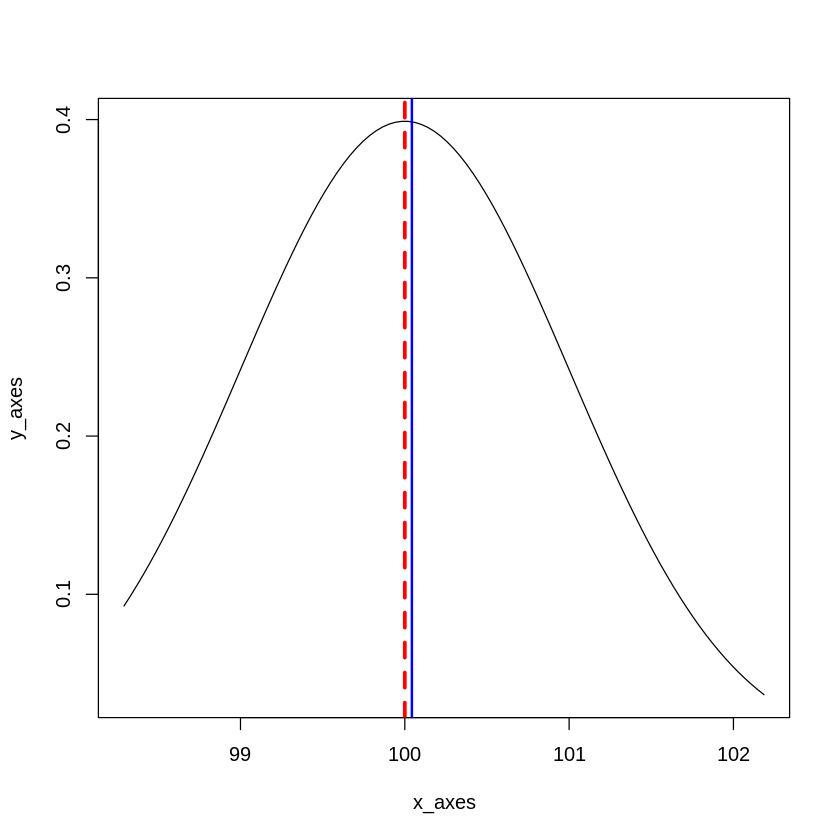

In [3]:
x_axes <- seq(min(sample), max(sample), length=100)
y_axes <- dnorm(x_axes, mean, s) 

plot(x_axes, y_axes, 'l')
abline(v=x, col='blue', lwd=2)
abline(v=mean, col='red', lwd=3, lty=2)

In [4]:
# another possibility without computing the z score
pval <- 2*(1-pnorm(mean, mean=x, sd=s/sqrt(n), lower.tail=FALSE))
print(paste('p-value: ', pval))

[1] "p-value:  0.738412566700812"


### p-value graphicaly

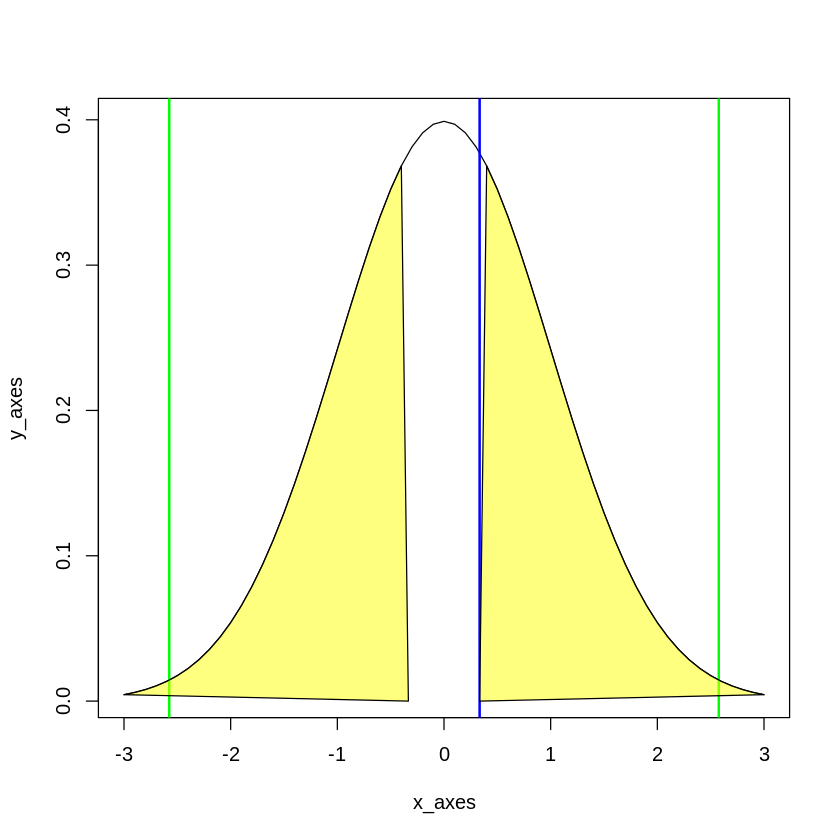

In [5]:
x_axes <- seq(-3, 3, 0.1)
y_axes <- dnorm(x_axes, 0, 1) 

plot(x_axes, y_axes, 'l')
abline(v=z, col='blue', lwd=2)
abline(v=2.576, col='green', lwd=2)
abline(v=-2.576, col='green', lwd=2)


polygon(c(x_axes[x_axes > z], z, z), 
        c(y_axes[x_axes > z], 0, 0), col=rgb(1, 1, 0 , 0.5))

polygon(c(x_axes[x_axes < -z], -z, -z), 
        c(y_axes[x_axes < -z], 0, 0), col=rgb(1, 1, 0 , 0.5))

### p-value from a students t-distribution

In [6]:
sample_sd <- sd(sample)
sample_sem <- sample_sd/sqrt(n)

t <- (x-mean)/sample_sem
print(paste('t score: ', t))
pval_from_t <- 2*pt(abs(t), df=n-1, lower.tail=FALSE)
print(paste('p-value: ', pval_from_t))

[1] "t score:  0.369528739864132"
[1] "p-value:  0.713056680247642"


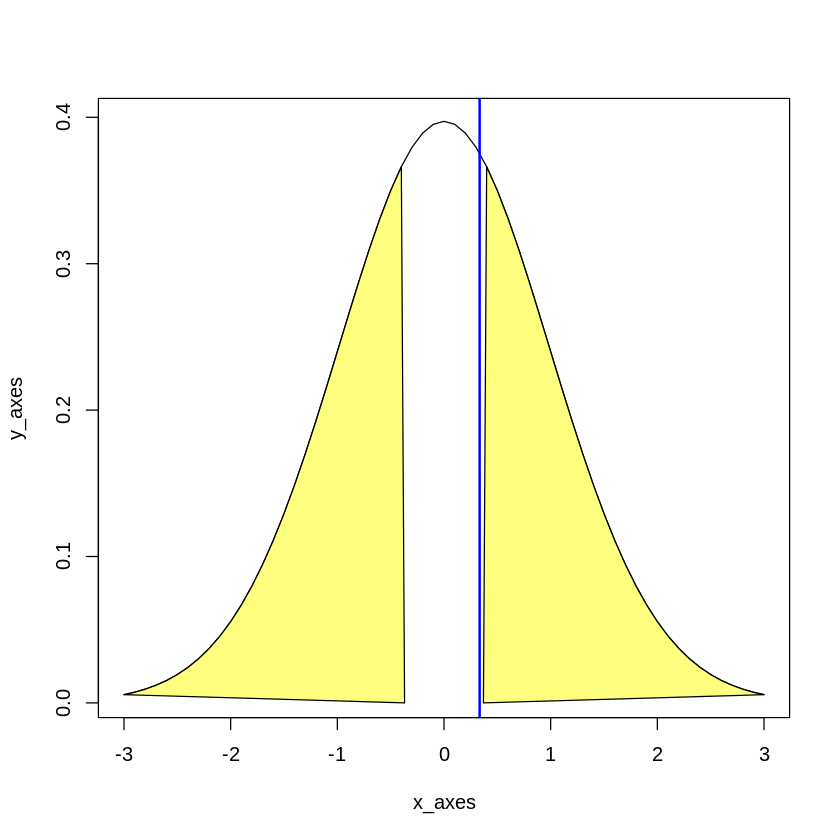

In [7]:
x_axes <- seq(-3, 3, 0.1)
y_axes <- dt(x_axes, df=n-1) 

plot(x_axes, y_axes, 'l')
abline(v=z, col='blue', lwd=2)
polygon(c(x_axes[x_axes > t], t, t), 
        c(y_axes[x_axes > t], 0, 0), col=rgb(1, 1, 0 , 0.5))

polygon(c(x_axes[x_axes < -t], -t, -t), 
        c(y_axes[x_axes < -t], 0, 0), col=rgb(1, 1, 0 , 0.5))

In [8]:
# exercise
# compute two tailed 95% confidence interval for our sample

In [9]:
upper_t <- qt(0.975, df=n-1)

t_lower_boundary <- x - upper_t*sample_sem
t_lower_boundary
t_upper_boundary <- x + upper_t*sample_sem
t_upper_boundary

[1] 99.80965

[1] 100.2766

# t-Test
<br>
A t-test is a statistical hypothesis test where the test statistic has a Student's distribution. 

In [10]:
# the easiest way
# https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/t.test

t_test <- t.test(sample, mu=mean, df=n-1)
t_test


	One Sample t-test

data:  sample
t = 0.36953, df = 59, p-value = 0.7131
alternative hypothesis: true mean is not equal to 100
95 percent confidence interval:
  99.80965 100.27657
sample estimates:
mean of x 
 100.0431 


## Types of t-Tests
<br>
1. One sample<br>
2. Two sample - independent<br>
3. Paired sample<br>

### 1. One sample t-Test

![one sample](https://github.com/kamclar/statisticka_analyza_dat_cviceni/blob/main/figs/one_sample_t_test.png?raw=true)

$
t = \frac {\bar{x}-\mu}{s/\sqrt{n}}
$



### A. One tailed t-test

### Exercise
From Martin Sicho's example.<br>
In the previous lesson, you were asked to construct a confidence interval for the volume of beer that will flow into a bottle from your prehistoric bottling machine. Now let's check if it is not possible to claim that our machine is cheating our customers and that on average less than the claimed 500 ml is flowing out of it.

The null hypothesis in our case would be:<br>
$H_0: \mu = 500$
<br>
So in this particular test, try to prove that the machine is cheating customers. For the test, choose a significance level of 1%, which is the chance that you will incorrectly accept $H_1$ assuming $H_0$ is true (the so-called first order error). Don't forget to state $H_1$.

In [11]:
url <- 'https://raw.githubusercontent.com/lich-uct/r_tutorial/56e08976134ebbfaa7739e244306650841c204a9/07/ukoly/plnici_stroj.csv'
sample <- read.table(url)$Volume
sample

[1] 484.11 459.49 471.38 512.01 494.48 528.63 493.64 485.03 473.88 501.59
[11] 502.85 538.08 465.68 495.03 475.32 529.41 518.13 464.32 449.08 489.27

Let's form alternative hypothesis:<br>
$H_1: \mu < 500$

In [12]:
x <- mean(sample)
s <- sd(sample) 
n <- length(sample)
sem <- s/sqrt(n) 
t_99 <- qt(0.99, df=n-1)


ci <- c(-Inf, x+(t_99 * sem))
ci

[1]     -Inf 505.6495

In [13]:
# let's get p value from distribution function
t <- (x - 500)/sem
print(paste('t: ', t))
p <- pt(t, df=n-1)
print(paste('p: ', p))

[1] "t:  -1.52046261020793"
[1] "p:  0.0724311264162951"


In [14]:
# r t.test function syntax
result <- t.test(sample, mu=500, alternative='less', conf.level=0.99)

At the 1% significance level, we cannot reject the null hypothesis.

### t-test object

In [16]:
# let's look at t-test result details
names(result)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

### B. Two tailed t-test

Let's try to test a two-tailed hypothesis, namely the case when the machine not only overfills but also underfills.<br>
$H_1: \mu ≠ 500$

In [17]:
t.test(sample, mu=500, alternative='two.sided', conf.level=0.99)


	One Sample t-test

data:  sample
t = -1.5205, df = 19, p-value = 0.1449
alternative hypothesis: true mean is not equal to 500
99 percent confidence interval:
 475.7094 507.4316
sample estimates:
mean of x 
 491.5705 


In [18]:
# deafault t-test setting is 'two.sided' with ci = 95%
t.test(sample, mu=500)


	One Sample t-test

data:  sample
t = -1.5205, df = 19, p-value = 0.1449
alternative hypothesis: true mean is not equal to 500
95 percent confidence interval:
 479.9667 503.1743
sample estimates:
mean of x 
 491.5705 


The confidence interval does not include the 500 ml value (the interval is open on both sides, so the 500 ml value does not fall within it). A higher confidence level would already lead to the inclusion of the $\mu_0$, and therefore we could no longer accept $H_1$, 

## 2. Two-sample t-test (independent)

![two-sample](https://github.com/kamclar/statisticka_analyza_dat_cviceni/blob/main/figs/two_sample_t_test.png?raw=true)


One-tailed hypothesis: 
<br>
$
H_0: \mu_A = \mu_B
$
<br>
$
H_1: \mu_A ≠ \mu_B
$
<br>
<br>
<br>
Welch t-statistics, for cases where variance of two compared groups differ:
<br>
<br>
$
t = \frac{\bar{X_A} - \bar{X_B}}{\sqrt{\frac{s_A^2}{n_A} + \frac{{s_B^2}}{n_B}}}
$
<br>
<br>
<br>
Degrees of freedom:
<br>
<br>
$
df = \frac{(s_A^2/n_A + s_B^2/n_B)^2}{(s_A^2/n_A)/(n_A - 1) + (s_B^2/n_B)/(n_B - 1)}
$
<br>
<br>
<br>
Classic t-statistics, variance of two compared groups are the same:
<br>
<br>
$
t = \frac{\bar{X_A} - \bar{X_B}}{\sqrt{\frac{s^2}{n_A} + \frac{{s^2}}{n_B}}}
$
<br>
<br>
<br>
$S^2$ is an estimator of the pooled variance of the two groups:
<br>
<br>
$
S^2 = \frac{\sum{(x - X_A)^2} - \sum{(x - X_B)^2}}{n_A + n_B - 2}
$
<br>
<br>
Degrees of freedom:
<br>
<br>
$
df = n_A + n_B - 2
$

In following example we have measured weight of group of men and group of women and we would like to test, whether generally men's weight is different then women's weight.<br>
$H_0: \mu_{women} = \mu_{men}$<br>
and alternative hypothesis will be: <br>
$H_1: \mu_{women} ≠ \mu_{men}$<br>

In [93]:
url = 'https://raw.githubusercontent.com/kamclar/statisticka_analyza_dat_cviceni/main/data/weights.txt'
data <- read.table(url, header=T)
head(data)

,group,weight
,<chr>,<dbl>
1,Woman,38.9
2,Woman,61.2
3,Woman,73.3
4,Woman,21.8
5,Woman,63.4
6,Woman,64.6


In [99]:
library('dplyr')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [101]:
summarise(group_by(data, group), count=n(), 
          mean=mean(weight, na.rm=T),
          sd=sd(weight, na.rm=T))

group,count,mean,sd
<chr>,<int>,<dbl>,<dbl>
Man,9,68.98889,9.375426
Woman,9,52.10000,15.596714


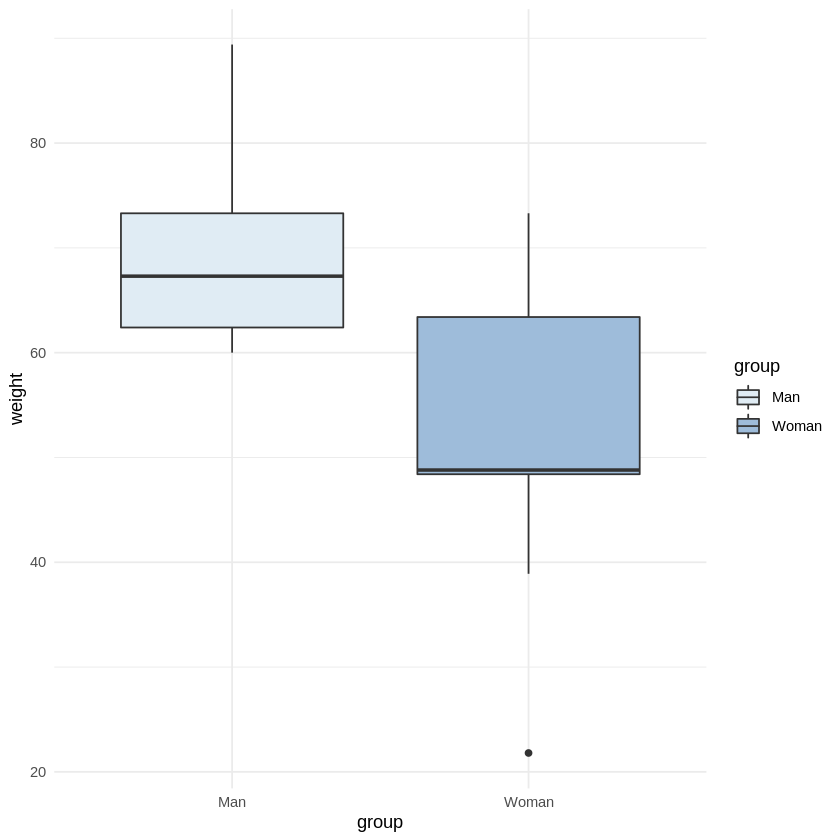

In [109]:
ggplot(data, aes(x=group, y=weight, fill=group)) + geom_boxplot() +
                                                   scale_fill_brewer(palette='BuPu') + 
                                                   theme_minimal()

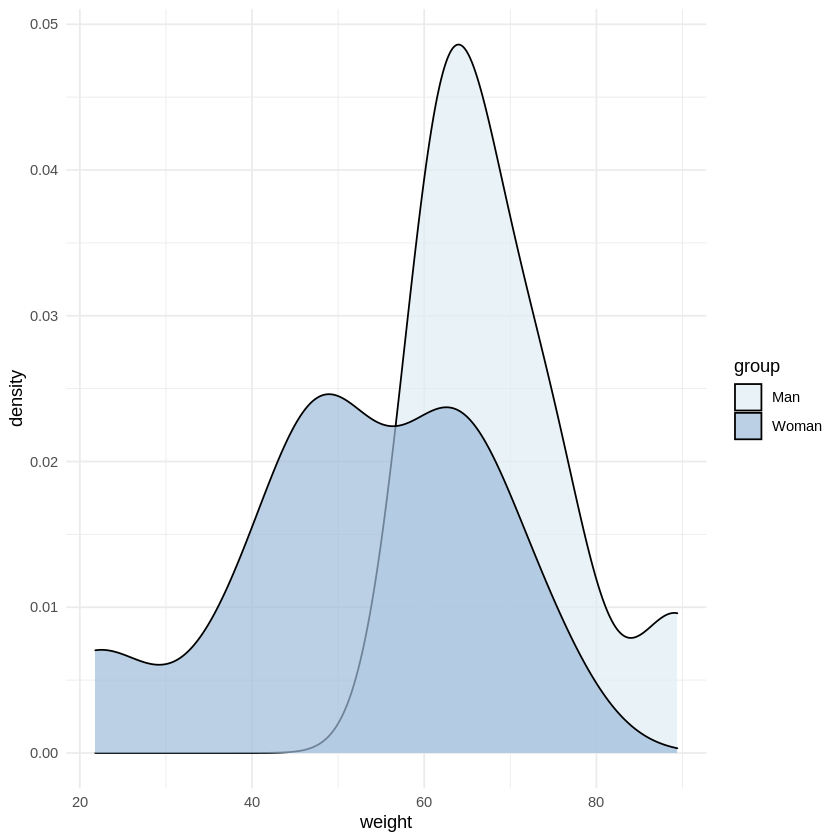

In [115]:
ggplot(data, aes(x=weight, fill=group)) +  geom_density(alpha=0.7) + 
                                           scale_fill_brewer(palette='BuPu') +
                                           theme_minimal()

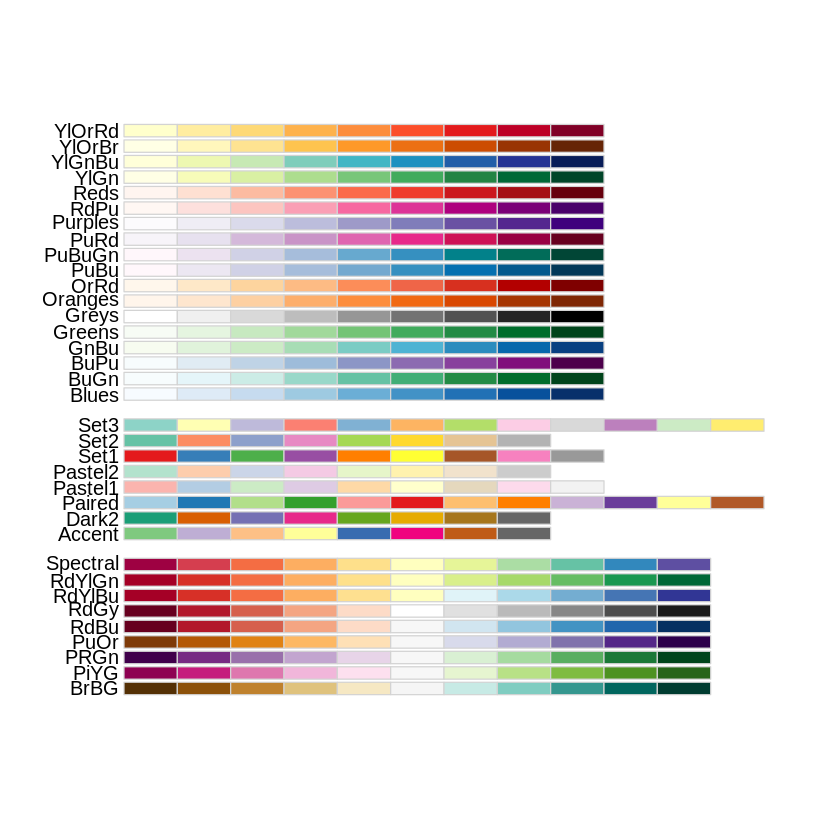

In [111]:
# https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3
RColorBrewer::display.brewer.all()

Let's find out whether there is a significant weight difference between two groups. And we will use significance level $α = 0.05$.

In [113]:
# first Welch test
t.test(weight ~ group, data=data, var.equal=FALSE)


	Welch Two Sample t-test

data:  weight by group
t = 2.7842, df = 13.114, p-value = 0.01538
alternative hypothesis: true difference in means between group Man and group Woman is not equal to 0
95 percent confidence interval:
  3.795858 29.981920
sample estimates:
  mean in group Man mean in group Woman 
           68.98889            52.10000 


In [112]:
# Classic t-test
t.test(weight ~ group, data=data, var.equal=TRUE)


	Two Sample t-test

data:  weight by group
t = 2.7842, df = 16, p-value = 0.01327
alternative hypothesis: true difference in means between group Man and group Woman is not equal to 0
95 percent confidence interval:
  4.029759 29.748019
sample estimates:
  mean in group Man mean in group Woman 
           68.98889            52.10000 


We can reject the null hypothesis and conclude that the average men's weight is signifficantly different with a p-value = 0.0154.

# Paired t-Test

The paired t-test is used in situations where there is an association between two measurements; samples are not independent. The most typical example is an experiment where measurements are repeated on the same population sample (called repeated measures). A typical example is a group of patients in whom the effect of a drug is measured.


$
H_0: \mu_d = \mu_{d0}
$
<br>
$
H_1: \mu_d ≠ \mu_{d0}
$
<br>
<br>
<br>
$
t = \frac{\bar{X_d} - \mu_{d0}}{\frac{s_d}{\sqrt{n}}}
$
<br>
<br>
$ \bar{X_d}$  - the sample mean of the differences in the paired measurements
<br>
n - number of pairs, not number of measurement
<br>
$\mu_{d0}$ - mean difference between pairs, usualy tests are tested against $\mu_{d0} = 0$

Let's have a dataset of patients before and after treatment that should change the blood level of LDL cholesterol. Our null hypothesis is that there is no difference between LDL cholesterol measurements before and after treatment.
This is a typical example, scientist, doctors, pharmaceutical companies would like to test a procedure, drug and typicaly the rejecting the null hypothesis is their goal.



In [122]:
# https://www.omnicalculator.com/health/cholesterol-units
data <- read.table('https://web.vscht.cz/~spiwokv/statistika/cholesterol.txt', skip=1)

head(data, 5)

,V1,V2,V3
,<int>,<int>,<int>
1,1,147,164
2,2,112,92
3,3,228,266
4,4,74,53
5,5,243,212


In [44]:
library('ggplot2')
library('reshape2')

In [61]:
data_melted <- melt(data[,2:3])
head(data_melted, 5)

No id variables; using all as measure variables



,variable,value
,<fct>,<int>
1,V2,147
2,V2,112
3,V2,228
4,V2,74
5,V2,243


In [132]:
summary(data)

       V1           V2              V3       
 Min.   : 1   Min.   : 71.0   Min.   : 43.0  
 1st Qu.:17   1st Qu.:164.0   1st Qu.:155.0  
 Median :33   Median :192.0   Median :177.0  
 Mean   :33   Mean   :188.8   Mean   :181.5  
 3rd Qu.:49   3rd Qu.:221.0   3rd Qu.:219.0  
 Max.   :65   Max.   :332.0   Max.   :310.0  

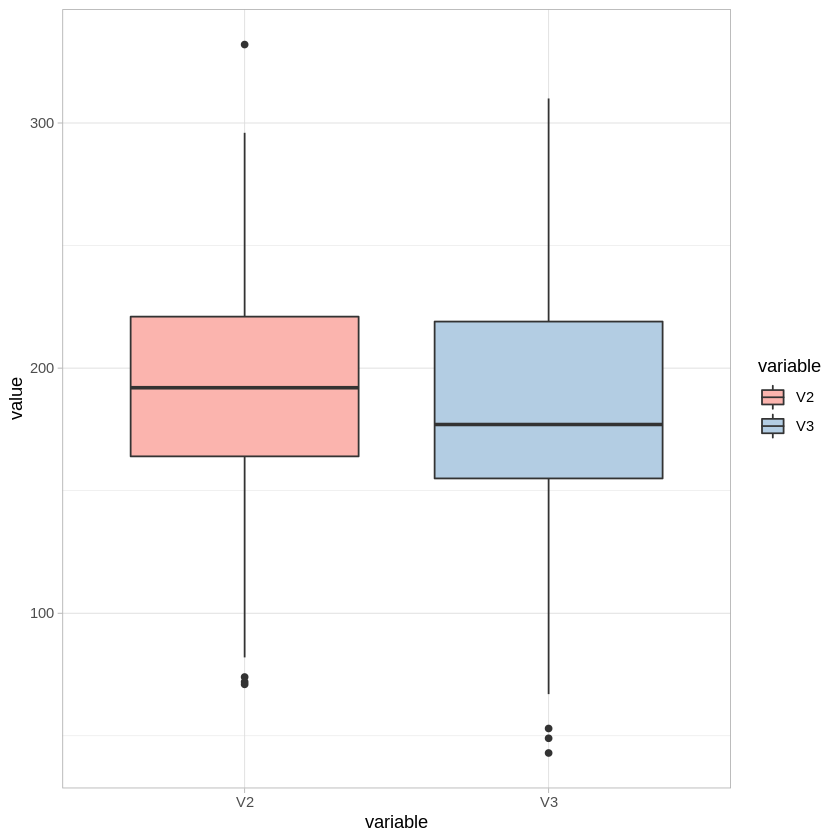

In [119]:
ggplot(data_melted, aes(x=variable, y=value, fill=variable)) + geom_boxplot() +
                                                               scale_fill_brewer(palette='Pastel1') + 
                                                               theme_light()

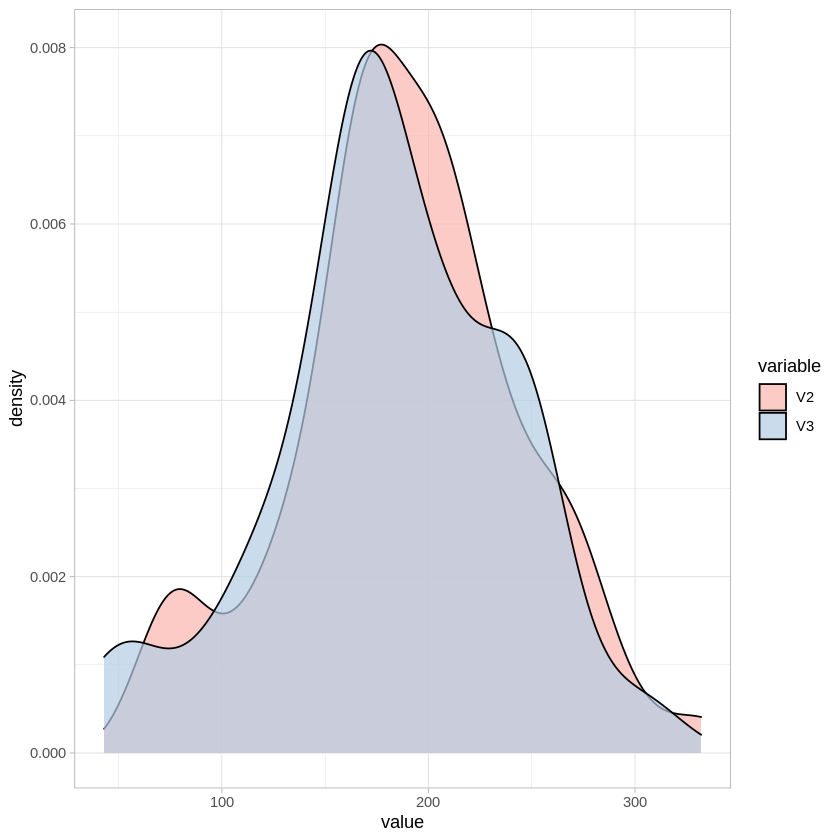

In [120]:
p <- ggplot(data_melted, aes(x=value, fill=variable)) +  geom_density(alpha=0.7) + 
                                                         scale_fill_brewer(palette='Pastel1') + 
                                                         theme_light()
                
p

In [130]:
install.packages('ggpubr')
library('ggpubr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




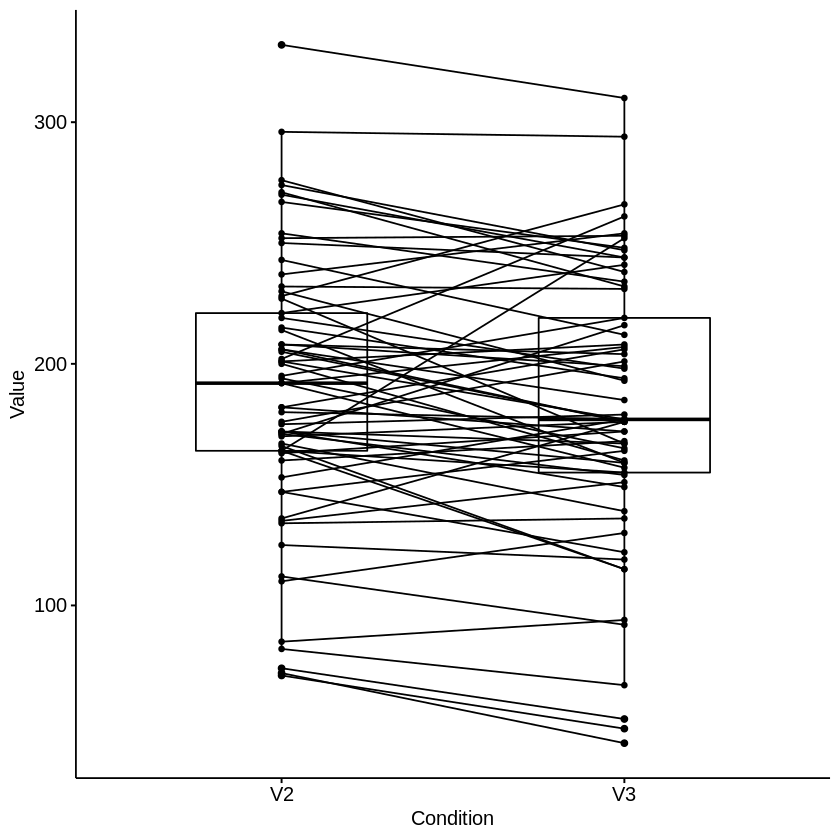

In [135]:
# we can also make a visualisation of individual patients before and after 
ggpaired(data, cond1 ="V2", cond2="V3")

Does it look there is a difference between means of these two sets of measurements? Let's find out using two sample t-test. We will use significance level (α = 0.01).

In [89]:
t.test(data$V2, data$V3, paired=T, conf.level=0.99)


	Paired t-test

data:  data$V2 and data$V3
t = 2.1154, df = 64, p-value = 0.03829
alternative hypothesis: true mean difference is not equal to 0
99 percent confidence interval:
 -1.859634 16.444250
sample estimates:
mean difference 
       7.292308 


We accept null hypothesis, that means of two samples does not differ.

In [90]:
# What if we used significance level of α = 0.05?
t.test(data$V2, data$V3, paired=T)


	Paired t-test

data:  data$V2 and data$V3
t = 2.1154, df = 64, p-value = 0.03829
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
  0.4056376 14.1789778
sample estimates:
mean difference 
       7.292308 


Null hypothesis can be rejected on this level of significance.